In [8]:
import os

import numpy as np
import pandas as pd

from app.modelling.transformers import ImputerBackTime

results = []
labels = []
files = os.listdir("transformed_data")
for file in files:
    data = pd.read_csv(f"transformed_data/{file}")
    a = data.query("DEPENDENT_VARIABLE_NAME == 'PM10'")["VALUE"].reset_index(drop=True)
    b = data.query("DEPENDENT_VARIABLE_NAME == 'PM25'")["VALUE"].reset_index(drop=True)
    c = data.query("DEPENDENT_VARIABLE_NAME == 'PM1'")["VALUE"].reset_index(drop=True)
    d = a.isna()
    e = b.isna()
    f = c.isna() 
    if sum(d) > len(a)*0.3:
        continue
    if sum(e) > len(b)*0.3:
        continue
    if sum(f) > len(c)*0.3:
        continue
    imputer = ImputerBackTime()
    a = imputer.fit_transform(a)
    b = imputer.fit_transform(b)
    c = imputer.fit_transform(c)
    a = a.bfill()
    b = b.bfill()
    c = c.bfill()
    a = a.ffill()
    b = b.ffill()
    c = c.ffill()
    labels.append(file.split(".")[0])
    time_series = pd.concat([a, b, c, d, e, f], axis=1).values
    results.append(time_series)

In [2]:
array = np.array(results)
array.shape

(11, 7745, 6)

In [4]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import silhouette_score

for n_clusters in range(2,7):
    km = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", n_init=100, random_state=0, init="random")
    y_pred = km.fit_predict(array)
    result = silhouette_score(array, y_pred, metric="euclidean")
    print(f"Silhouette score for {n_clusters} clusters: {result}")

c:\Users\Mambo\.conda\envs\bachelor\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


KeyboardInterrupt: 

In [5]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", n_init=100, random_state=0, init="random")
y_pred = km.fit_predict(array)

In [9]:
y_pred

array([2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
labels[:6]

['100427', '101557', '102630', '103261', '103311', '103326']

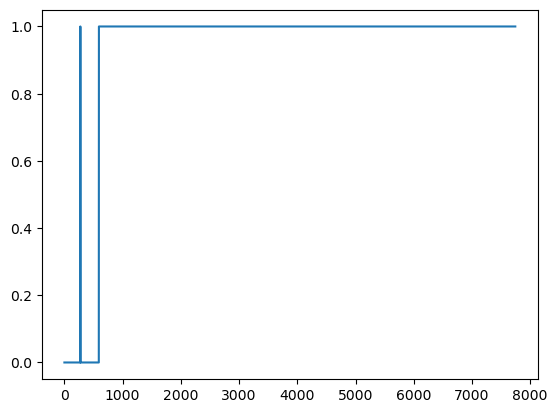

In [53]:
plt.plot(array[no, :, 3])